In [18]:
import nltk
import os
from nltk.tokenize import word_tokenize
from lemminflect import getLemma
import spacy
nlp = spacy.load("en_core_web_sm")

In [19]:
finalDict = {}

In [20]:
## Get a list of all the .txt files
originalFileList = os.listdir(os.getcwd())
fileList = [x for x in originalFileList if x.endswith('.txt')]
notFileList = [x for x in originalFileList if not x.endswith('.txt')]

In [21]:
## These are the .txt files
print(fileList[:20])
print()
## These are the files in the folder that are not included in fileList
print(notFileList)

['s1e17.txt', 's2e1.txt', '20180504-Re_Sweet Pablo from Cincinnati __ Saturday, June 23-839.txt', '20170728-Re_Resume-709.txt', '20190406-Re_2018_2017 taxes, peter boylan-184.txt', '20201118-no_subject-944.txt', '20171202-Order #1938-1040.txt', '20201022-oct 25 foraging hike-408.txt', '20200802-Re_PSRE Volunteering-637.txt', '20190811-no_subject-284.txt', '20180404-booking request __ June 17th __ Sweet Pablo-1048.txt', '20190919-Re_Proposed LeakyCon Flights - Andrew Boylan-979.txt', '20201122-no_subject-286.txt', '20170801-Re_Applicant __ Dropped off a resume-927.txt', '20190719-asdf-369.txt', '20180502-Re_Sweet Pablo from Cincinnati __ Saturday, June 23-1346.txt', '20210810-Alert - Stay at Mole Verde (room)-1110.txt', '20190423-Toronto guest list-1380.txt', '20190710-Re_BOSTON flight not dallas Re_ dallas flight for leaky 2019-509.txt', '20171217-Re_Merch_tech-815.txt']

['allVocab.json', '.DS_Store', 'vocabSize.ipynb', '.ipynb_checkpoints']


In [28]:
for fileName in fileList:
    ## These files we need to read in line by line
    if fileName == 'Dune.txt' or fileName == 'Journal.txt':
        with open(fileName, 'r') as file:
            line = file.readline()
            while line:
                try:
                    line = file.readline()
                    doc = nlp(line)
                    for token in doc:
                        if token.is_alpha and token.pos_ != 'PROPN':
                            finalDict[token.lemma_] = 1
                except:
                    pass
        continue
        
    ## All the other files we can load in all at once
    else:    
        with open(fileName, 'r') as file:
            text = file.read()
        doc = nlp(text)
        for token in doc:
            if token.is_alpha and token.pos_ != 'PROPN':
                finalDict[token.lemma_] = 1

In [31]:
len(finalDict)

20646

In [19]:
len(fileList)

1502

In [30]:
## Save the vocab dictionary as a json file
import json
with open('allVocab.json', 'w') as fp:
    json.dump(finalDict, fp)

In [22]:
## BONUS ROUND for getting token to type ratio 
tokenNum = 0
typeNum = 0
ratioDict = {}

for fileName in fileList:
    ## These files we need to read in line by line
    if fileName == 'Dune.txt' or fileName == 'Journal.txt':
        with open(fileName, 'r') as file:
            line = file.readline()
            while line:
                try:
                    line = file.readline()
                    doc = nlp(line)
                    for token in doc:
                        tokenNum += 1
                        if token.is_alpha and token.pos_ != 'PROPN':
                            if token.lemma_ not in finalDict:
                                typeNum += 1
                            finalDict[token.lemma_] = 1
                            
                        ratioDict[typeNum] = tokenNum
                except:
                    pass
        continue
        
    ## All the other files we can load in all at once
    else:    
        with open(fileName, 'r') as file:
            text = file.read()
        doc = nlp(text)
        for token in doc:
            tokenNum += 1
            if token.is_alpha and token.pos_ != 'PROPN':
                if token.lemma_ not in finalDict:
                    typeNum += 1
                finalDict[token.lemma_] = 1
            ratioDict[typeNum] = tokenNum

In [23]:
# keys are number of types/words, values are number of tokens
ratioDict

{0: 2,
 1: 4,
 2: 6,
 3: 8,
 4: 11,
 5: 12,
 6: 14,
 7: 15,
 8: 16,
 9: 17,
 10: 18,
 11: 19,
 12: 20,
 13: 23,
 14: 24,
 15: 25,
 16: 26,
 17: 30,
 18: 33,
 19: 37,
 20: 38,
 21: 39,
 22: 41,
 23: 43,
 24: 44,
 25: 45,
 26: 48,
 27: 51,
 28: 52,
 29: 53,
 30: 54,
 31: 57,
 32: 60,
 33: 61,
 34: 62,
 35: 63,
 36: 65,
 37: 66,
 38: 67,
 39: 69,
 40: 70,
 41: 72,
 42: 75,
 43: 76,
 44: 77,
 45: 82,
 46: 83,
 47: 84,
 48: 85,
 49: 86,
 50: 87,
 51: 90,
 52: 92,
 53: 93,
 54: 94,
 55: 95,
 56: 98,
 57: 100,
 58: 101,
 59: 106,
 60: 108,
 61: 114,
 62: 116,
 63: 118,
 64: 121,
 65: 122,
 66: 123,
 67: 124,
 68: 126,
 69: 128,
 70: 129,
 71: 130,
 72: 131,
 73: 133,
 74: 135,
 75: 136,
 76: 138,
 77: 139,
 78: 140,
 79: 143,
 80: 144,
 81: 148,
 82: 152,
 83: 155,
 84: 156,
 85: 158,
 86: 159,
 87: 160,
 88: 161,
 89: 162,
 90: 166,
 91: 167,
 92: 171,
 93: 176,
 94: 177,
 95: 183,
 96: 185,
 97: 190,
 98: 193,
 99: 194,
 100: 197,
 101: 210,
 102: 218,
 103: 221,
 104: 224,
 105: 226,
 106:

In [28]:
import matplotlib.pyplot as plt
import numpy as np

numTypes = list(ratioDict.keys())
numTokens = list(ratioDict.values())

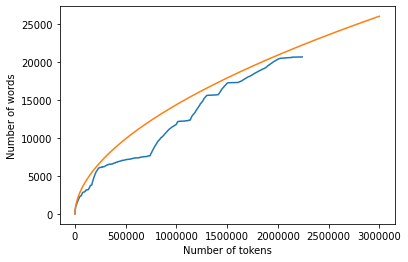

In [58]:
plt.plot(numTokens, numTypes)
plt.xlabel("Number of tokens")
plt.ylabel("Number of words")

## Orange line is Heaps' Law

k = 50
beta = .54
xs = list(range(0, 3000000, 1000)) 
ys = [(k * n) ** beta for n in xs]
plt.plot(xs, ys)
plt.ticklabel_format(style='plain') 

plt.show()

In [50]:
max(ratioDict.keys())

20646

In [51]:
ratioDict[20646]

2240305

In [ ]:
## So at 2,240,305 tokens, we have 20,646 words
## This approximately matches Heaps' Law with k = 50 and beta = 0.54